<a href="https://colab.research.google.com/github/Neel7317/Deep-Learning-/blob/master/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
import numpy as np

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data.type()

'torch.LongTensor'

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [4]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 



In [5]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.3691, 0.3841],
        [0.9790, 0.3409]]) 



In [7]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1159, 0.2135, 0.3542],
        [0.1377, 0.3712, 0.9624]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [10]:
print(torch.cuda.is_available())

True


In [11]:
data=[[1,2,0],[3,4,5]]
tensor=torch.tensor(data)

In [12]:
tensor.shape

torch.Size([2, 3])

In [13]:
tensor.dtype

torch.int64

In [14]:
tensor.device

device(type='cpu')

In [15]:
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"second column:{tensor[:,1]}")
print(f"Last column: {tensor[:, -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1, 2, 0])
First column: tensor([1, 3])
second column:tensor([2, 4])
Last column: tensor([0, 5])
tensor([[1, 0, 0],
        [3, 0, 5]])


In [16]:
data1=[[1,2,3,4],[5,6,7,8]]
data2=[[11,12,13,14],[15,16,17,18]]
t1=torch.tensor(data1)
t2=torch.tensor(data2)

In [17]:
t1

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [18]:
t2

tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])

In [19]:
t3=torch.cat([t1,t2],dim=1)#1 for coulmwise,0 for rowwise..
t3

tensor([[ 1,  2,  3,  4, 11, 12, 13, 14],
        [ 5,  6,  7,  8, 15, 16, 17, 18]])

In [20]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



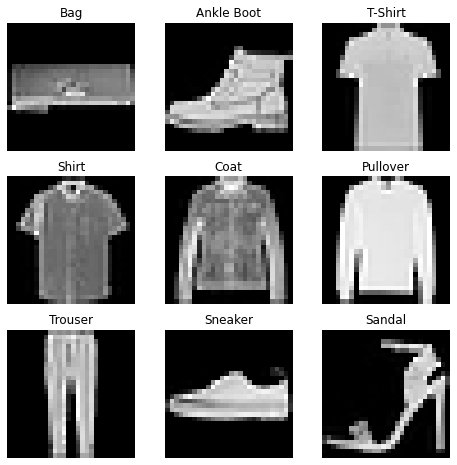

In [22]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [23]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [1]:
# Import dependencies
import torch 
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Get data 
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
dataset = DataLoader(train, 32)
#1,28,28 - classes 0-9

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
# Image Classifier Neural Network
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-6)*(28-6), 10)  
        )

    def forward(self, x): 
        return self.model(x)

In [4]:
# Instance of the neural network, loss, optimizer 
clf = ImageClassifier().to('cuda')
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss() 

In [5]:
# Training flow 
if __name__ == "__main__": 
    for epoch in range(10): # train for 10 epochs
        for batch in dataset: 
            X,y = batch 
            X, y = X.to('cuda'), y.to('cuda') 
            yhat = clf(X) 
            loss = loss_fn(yhat, y) 

            # Apply backprop 
            opt.zero_grad()
            loss.backward() 
            opt.step() 

        print(f"Epoch:{epoch} loss is {loss.item()}")

Epoch:0 loss is 0.05653601139783859
Epoch:1 loss is 0.004465015139430761
Epoch:2 loss is 0.0006749052554368973
Epoch:3 loss is 0.00024267284607049078
Epoch:4 loss is 0.00012708349095191807
Epoch:5 loss is 9.659062015998643e-06
Epoch:6 loss is 2.9802288281643996e-07
Epoch:7 loss is 3.419713266339386e-06
Epoch:8 loss is 1.5385123788291821e-06
Epoch:9 loss is 1.8589007595437579e-06


In [6]:
with open('model_state.pt', 'wb') as f: 
        save(clf.state_dict(), f) 

In [7]:
with open('model_state.pt', 'rb') as f: 
        clf.load_state_dict(load(f)) 

In [8]:
with open('model_state.pt', 'rb') as f: 
    clf.load_state_dict(load(f))  

    img = Image.open('img_3.jpg') 
    img_tensor = ToTensor()(img).unsqueeze(0).to('cuda')

    print(torch.argmax(clf(img_tensor)))

tensor(9, device='cuda:0')
